In [2]:
import numpy as np
import matplotlib.pyplot as plt
from OAM import dataGen
from numpy import fft

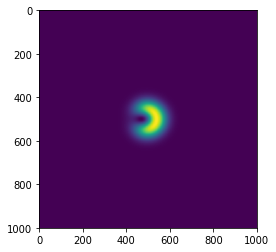

In [11]:
a = 10/(2*np.pi); b = 3
k = 2*np.pi; f = .3; lam = 2*np.pi/k
l = 1

x = np.linspace(-10,10,1000); y = np.linspace(-10,10,1000)
X,Y = np.meshgrid(x,y)

mode = np.exp(-1j*Y)*dg.LG(X,Y,l=-1,w_0=1.5) +  dg.LG(X,Y,l=0,w_0=1.5)
plt.imshow(np.abs(mode)**2)
plt.show()

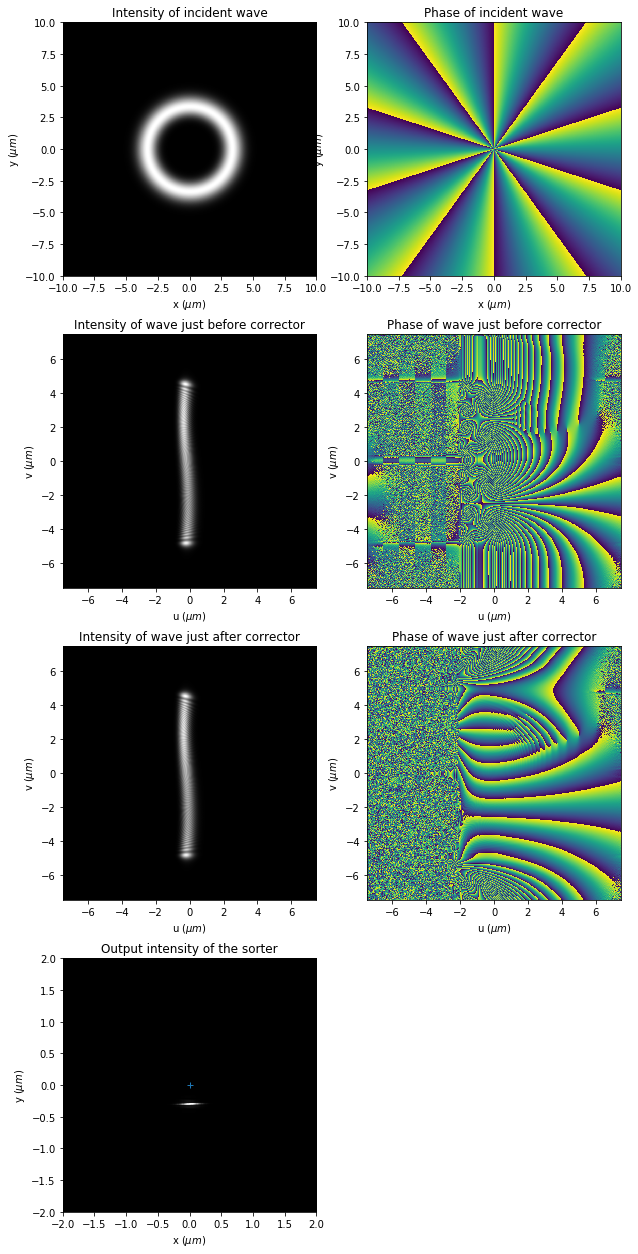

In [36]:
a = 10/(2*np.pi); b = 3
k = 2*np.pi; f = .3; lam = 2*np.pi/k
l = 10

x = np.linspace(-10,10,1000); y = np.linspace(-10,10,1000)
X,Y = np.meshgrid(x,y); dx = x[1]-x[0]; dy = y[1]-y[0]; xres = len(x); yres = len(y)
u = lam*f*np.linspace(-1/(2*dx),(xres-2)/(2*dx*xres),xres)
v = lam*f*np.linspace(-1/(2*dy),(yres-2)/(2*dy*yres),yres)
U,V = np.meshgrid(u,v)

phi_u = a*k/f*(Y*np.arctan2(Y,X)-X*np.log(np.sqrt(X**2+Y**2)/b)+X)
phi_c = -a*k*b/f*np.exp(-U/a)*np.cos(V/a)

mode = dg.LG(X,Y,l,w_0=1.5)
mode1 = fft.fftshift(fft.fft2(fft.fftshift(mode*np.exp(1j*phi_u))))
mode2 = mode1*np.exp(1j*phi_c)
mode3 = fft.fftshift(fft.ifft2(fft.fftshift(mode2)))

extent1 = [x[0],x[-1],y[0],y[-1]]
extent2 = [u[0],u[-1],u[0],u[-1]]
extent3 = 1/5*np.array(extent1)

plt.figure(figsize=(10,22))
plt.subplot(421); plt.imshow(np.abs(mode)**2,cmap='binary_r',extent=extent1)
plt.title("Intensity of incident wave")
plt.xlabel("x ($\mu m$)"); plt.ylabel("y ($\mu m$)")
plt.subplot(422); plt.imshow(np.angle(mode),extent=extent1)
plt.title("Phase of incident wave"); plt.xlabel("x ($\mu m$)"); plt.ylabel("y ($\mu m$)")
plt.subplot(423); plt.imshow(np.abs(mode1)**2,cmap='binary_r',extent=extent2)
plt.title("Intensity of wave just before corrector")
plt.xlabel("u ($\mu m$)"); plt.ylabel("v ($\mu m$)")
plt.subplot(424); plt.imshow(np.angle(mode1),extent=extent2)
plt.title("Phase of wave just before corrector")
plt.xlabel("u ($\mu m$)"); plt.ylabel("v ($\mu m$)")
plt.subplot(425); plt.imshow(np.abs(mode2)**2,cmap='binary_r',extent=extent2)
plt.title("Intensity of wave just after corrector")
plt.xlabel("u ($\mu m$)"); plt.ylabel("v ($\mu m$)")
plt.subplot(426); plt.imshow(np.angle(mode2),extent=extent2)
plt.title("Phase of wave just after corrector")
plt.xlabel("u ($\mu m$)"); plt.ylabel("v ($\mu m$)")
plt.subplot(427); plt.imshow(np.abs(mode3[400:600,400:600])**2,cmap='binary_r',extent=extent3)
plt.title("Output intensity of the sorter")
plt.xlabel("x ($\mu m$)"); plt.ylabel("y ($\mu m$)")
plt.plot(0,0,'+')
plt.savefig("dummy1.png")
plt.show()

plt.figure(figsize=(10,8))
plt.subplot(121)
plt.imshow(np.abs(mode)**2); plt.title("Incident intensity")
plt.

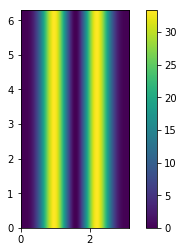